In [1]:
import warnings
warnings.filterwarnings("ignore")

import logging, sys
logging.disable(sys.maxsize)

import numpy as np

In [2]:
from pyaxis import pyaxis

In [3]:
# url = 'https://pxweb.stat.si/SiStatData/Resources/PX/Databases/Data/05I1002S.PX'
url = './naravni_prirast.PX'
px = pyaxis.parse(url, encoding='UTF-8')

**Podatki o naravnem prirastu**

In [4]:
px['DATA']

,OBCINE,LETO,MERITVE,DATA
0,SLOVENIJA,1995,Zivorojeni - Skupaj,18980
1,SLOVENIJA,1995,Zivorojeni - moski,9741
2,SLOVENIJA,1995,Zivorojeni - zenske,9239
3,SLOVENIJA,1995,Umrli - Skupaj,18968
4,SLOVENIJA,1995,Umrli - moski,9630
...,...,...,...,...
66451,Zuzemberk,2020,Naravni prirast - moski,9
66452,Zuzemberk,2020,Naravni prirast - zenske,-10
66453,Zuzemberk,2020,Zivorojeni na 1.000 prebivalcev,8.3
66454,Zuzemberk,2020,Umrli na 1.000 prebivalcev,8.5


In [5]:
# Spreminjanje podatkov za Slovenijo med leti 95-20
df = px['DATA']

**Naravni prirast za Slovenijo med leti 1995 in 2020**

In [6]:
np_slo = {}

for i in range(len(df)):
    if df.loc[i, "OBCINE"] == "SLOVENIJA" and df.loc[i, "MERITVE"] == "Naravni prirast - Skupaj":
        np_slo[str(df.loc[i, "LETO"])] = int(df.loc[i, "DATA"])
        
print(np_slo)

{'1995': 12, '1996': 168, '1997': -763, '1998': -1183, '1999': -1352, '2000': -408, '2001': -1031, '2002': -1200, '2003': -2130, '2004': -562, '2005': -668, '2006': 752, '2007': 1239, '2008': 3509, '2009': 3106, '2010': 3734, '2011': 3248, '2012': 2681, '2013': 1777, '2014': 2279, '2015': 807, '2016': 656, '2017': -268, '2018': -900, '2019': -1260, '2020': -5249}


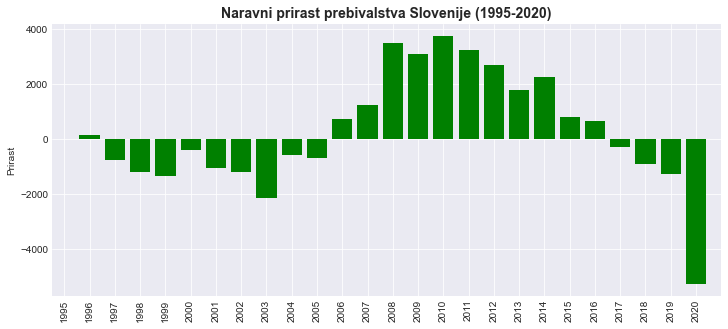

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(12, 5))
plt.title('Naravni prirast prebivalstva Slovenije (1995-2020)', fontsize=14, fontweight='bold')
plt.bar(np_slo.keys(), np_slo.values(), color='g')
plt.xlim(-0.5, len(np_slo.keys()))
plt.xticks(range(len(np_slo.keys())))
plt.gca().set_xticklabels(np_slo.keys(), rotation=90)
plt.ylabel('Prirast');

**Naravni prirast na 1000 prebivalcev za Slovenijo med leti 1990 in 2020**

In [8]:
np1000_slo = {}

for i in range(len(df)):
    if df.loc[i, "OBCINE"] == "SLOVENIJA" and df.loc[i, "MERITVE"] == "Naravni prirast na 1.000 prebivalcev":
        if df.loc[i, "DATA"] != '"-"':
            np1000_slo[str(df.loc[i, "LETO"])] = float(df.loc[i, "DATA"])  
        
print(np1000_slo)

{'1997': -0.4, '1998': -0.6, '1999': -0.7, '2000': -0.2, '2001': -0.5, '2002': -0.6, '2003': -1.1, '2004': -0.3, '2005': -0.3, '2006': 0.4, '2007': 0.6, '2008': 1.7, '2009': 1.5, '2010': 1.8, '2011': 1.6, '2012': 1.3, '2013': 0.9, '2014': 1.105439743347838, '2015': 0.4, '2016': 0.317792350796249, '2017': -0.1, '2018': -0.4, '2019': -0.6, '2020': -2.5}


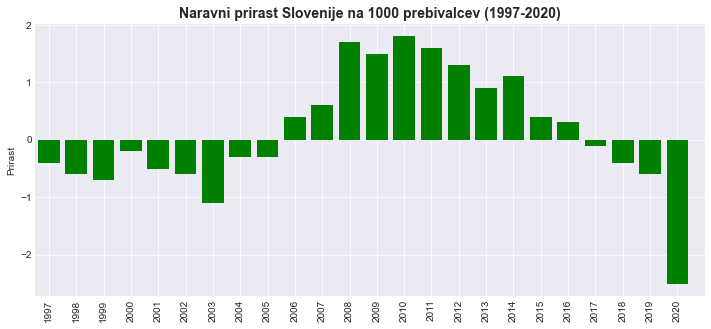

In [9]:
plt.figure(figsize=(12, 5))
plt.title('Naravni prirast Slovenije na 1000 prebivalcev (1997-2020)', fontsize=14, fontweight='bold')
plt.bar(np1000_slo.keys(), np1000_slo.values(), color='g')
plt.xlim(-0.5, len(np1000_slo.keys()))
plt.xticks(range(len(np1000_slo.keys())))
plt.gca().set_xticklabels(np1000_slo.keys(), rotation=90)
plt.ylabel('Prirast');

**Povprečen naravni prirastek glede na občino**

In [10]:
np_obcine = {}

for i in range(len(df)):
    if df.loc[i, "MERITVE"] == "Naravni prirast - Skupaj":
        if df.loc[i, "OBCINE"] not in np_obcine.keys():
            np_obcine[df.loc[i, "OBCINE"]] = []
        np_obcine[df.loc[i, "OBCINE"]].append(float(df.loc[i, "DATA"]))

for obcina in np_obcine:
    print(obcina, ">", np.nanmean(np_obcine[obcina]))

print("-------------------------------")
print(max(np_obcine, key=np_obcine.get), np.nanmean(np_obcine[max(np_obcine, key=np_obcine.get)]))
print(min(np_obcine, key=np_obcine.get), np.nanmean(np_obcine[min(np_obcine, key=np_obcine.get)]))

SLOVENIJA > 269.0
Ajdovscina > 35.80769230769231
Ankaran/Ancarano > 1.8333333333333333
Apace > -3.5714285714285716
Beltinci > -12.384615384615385
Benedikt > 6.590909090909091
Bistrica ob Sotli > -5.5
Bled > 0.11538461538461539
Bloke > -2.5454545454545454
Bohinj > -9.384615384615385
Borovnica > 17.46153846153846
Bovec > -14.576923076923077
Braslovce > 9.181818181818182
Brda > -16.5
Brezovica > 26.884615384615383
Brezice > -77.03846153846153
Cankova > -9.909090909090908
Celje > -14.0
Cerklje na Gorenjskem > 21.615384615384617
Cerknica > -5.230769230769231
Cerkno > 3.576923076923077
Cerkvenjak > -1.8636363636363635
Cirkulane > -6.714285714285714
Crensovci > -7.538461538461538
Crna na Koroskem > -7.923076923076923
Crnomelj > -24.384615384615383
Destrnik > -1.3076923076923077
Divaca > -9.538461538461538
Dobje > -0.3181818181818182
Dobrepolje > -7.653846153846154
Dobrna > 1.6818181818181819
Dobrova - Polhov Gradec > 36.73076923076923
Dobrovnik/Dobronak > -4.409090909090909
Dol pri Ljubljani 

**Občine z manjkajočimi vrednostmi**

In [11]:
import math

i = 0
for obcina in np_obcine:
    for el in np_obcine[obcina]:
        if math.isnan(el):
            print(obcina)
            i += 1
            break

print("Število občin z manjkajočimi vrednostmi:", i)

Ankaran/Ancarano
Apace
Benedikt
Bistrica ob Sotli
Bloke
Braslovce
Cankova
Cerkvenjak
Cirkulane
Dobje
Dobrna
Dobrovnik/Dobronak
Dolenjske Toplice
Gorje
Grad
Hajdina
Hoce - Slivnica
Hodos/Hodos
Horjul
Jezersko
Komenda
Kostanjevica na Krki
Kostel
Krizevci
Log - Dragomer
Lovrenc na Pohorju
Makole
Markovci
Miklavz na Dravskem polju
Mirna
Mirna Pec
Mokronog - Trebelno
Oplotnica
Podlehnik
Poljcane
Polzela
Prebold
Prevalje
Razkrizje
Recica ob Savinji
Rence - Vogrsko
Ribnica na Pohorju
Selnica ob Dravi
Sodrazica
Solcava
Sredisce ob Dravi
Straza
Sveta Ana
Sveta Trojica v Slov. goricah
Sveti Andraz v Slov. goricah
Sveti Jurij v Slov. goricah
Sveti Tomaz
Sempeter - Vrtojba
Sentrupert
Smarjeske Toplice
Smartno pri Litiji
Tabor
Trnovska vas
Trzin
Velika Polana
Verzej
Vransko
Zetale
Zirovnica
Zuzemberk
Število občin z manjkajočimi vrednostmi: 65


**Naravni prirastek glede na spol**

In [12]:
# povprečen naravni prirastek (spol - Slovenija)

np_moski = []
np_zenske = []

for i in range(len(df)):
    if df.loc[i, "OBCINE"] == "SLOVENIJA" and df.loc[i, "MERITVE"] == "Naravni prirast - moski":
        np_moski.append(int(df.loc[i, "DATA"]))
    if df.loc[i, "OBCINE"] == "SLOVENIJA" and df.loc[i, "MERITVE"] == "Naravni prirast - zenske":
        np_zenske.append(int(df.loc[i, "DATA"]))
        
#print("Naravni prirast moski: ", np.mean(np_moski))
#print("Naravni prirast zenske: ", np.mean(np_zenske))

np_mzdict = {}
i = 1995
for x, y in zip(np_moski, np_zenske):
    np_mzdict[i] = [x, y]
    i += 1
    
np_moski = np.array(list(np_mzdict.values()))[:,0]
np_zenske = np.array(list(np_mzdict.values()))[:,1]
print(np_mzdict)

{1995: [111, -99], 1996: [212, -44], 1997: [-326, -437], 1998: [-470, -713], 1999: [-622, -730], 2000: [-189, -219], 2001: [-590, -441], 2002: [-671, -529], 2003: [-1145, -985], 2004: [-378, -184], 2005: [-58, -610], 2006: [492, 260], 2007: [679, 560], 2008: [1952, 1557], 2009: [2016, 1090], 2010: [2212, 1522], 2011: [2013, 1235], 2012: [1907, 774], 2013: [1249, 528], 2014: [1720, 559], 2015: [867, -60], 2016: [693, -37], 2017: [347, -615], 2018: [44, -944], 2019: [-135, -1125], 2020: [-2040, -3209]}


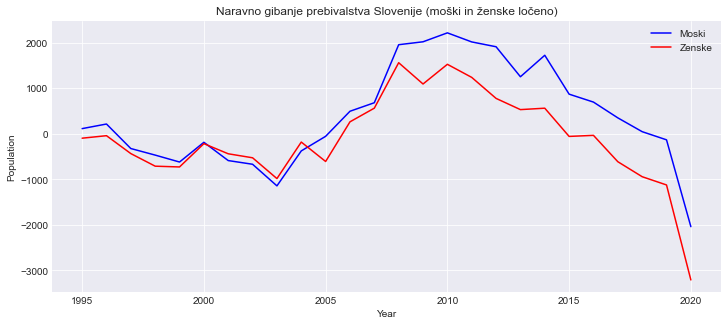

In [13]:
plt.figure(figsize=(12, 5))

plt.xlabel('Year'); 
plt.ylabel('Population'); 
plt.title("Naravno gibanje prebivalstva Slovenije (moški in ženske ločeno)")
plt.plot(np_mzdict.keys(), np_moski, color='b', label="Moski");
plt.plot(np_mzdict.keys(), np_zenske, color='r', label="Zenske");
plt.legend()
plt.show()

**Podatki o izobrazbi**

In [14]:
url = './izobrazba.PX'
px1 = pyaxis.parse(url, encoding='ISO-8859-2')

# Delovno aktivno prebivalstvo - izbrani kazalniki, občine, Slovenija, letno  (OPSI)
# Stopnja delovne aktivnosti
# Stopnja delovne aktivnosti se izračuna tako, da se število delovno aktivnih oseb, starih 20–64 let,
# deli s celotnim prebivalstvom v isti starostni skupini.
px1["DATA"]

,OBCINE,LETO,DOSEZENA IZOBRAZBA,SPOL,DATA
0,SLOVENIJA,2005,Izobrazba - SKUPAJ,Spol - SKUPAJ,813529
1,SLOVENIJA,2005,Izobrazba - SKUPAJ,Moski,454704
2,SLOVENIJA,2005,Izobrazba - SKUPAJ,Zenske,358825
3,SLOVENIJA,2005,Osnovnosolska ali manj,Spol - SKUPAJ,166006
4,SLOVENIJA,2005,Osnovnosolska ali manj,Moski,100017
...,...,...,...,...,...
54310,Ankaran/Ancarano,2021,"Visjesolska, visokosolska",Moski,137
54311,Ankaran/Ancarano,2021,"Visjesolska, visokosolska",Zenske,286
54312,Ankaran/Ancarano,2021,Neznano,Spol - SKUPAJ,NaN
54313,Ankaran/Ancarano,2021,Neznano,Moski,NaN


**Podatki o mesečnih plačah**

In [15]:
# Povprečne mesečne plače po občinah
url = './povprecne_place.PX'
px2 = pyaxis.parse(url, encoding='ISO-8859-2')
px2["DATA"]

,OBCINE,KAZALNIK,LETO,DATA
0,SLOVENIJA,Povprecna mesecna bruto placa,2005,1157.07
1,SLOVENIJA,Povprecna mesecna bruto placa,2006,1212.8
2,SLOVENIJA,Povprecna mesecna bruto placa,2007,1284.79
3,SLOVENIJA,Povprecna mesecna bruto placa,2008,1391.43
4,SLOVENIJA,Povprecna mesecna bruto placa,2009,1438.96
...,...,...,...,...
39826,zuzemberk,Zaposlene osebe z izplacanimi nadurami,2017,12.9
39827,zuzemberk,Zaposlene osebe z izplacanimi nadurami,2018,17.3
39828,zuzemberk,Zaposlene osebe z izplacanimi nadurami,2019,14.7
39829,zuzemberk,Zaposlene osebe z izplacanimi nadurami,2020,11.7


****
**Cilj: Napoved naravnega prirasta prebivalstva za prihodnost** 
    - S pomočjo linearne regresije bomo skušali zgraditi model, ki bo napovedoval gibanje naravnega prirasta v prihodnosti

In [16]:
px['DATA']

,OBCINE,LETO,MERITVE,DATA
0,SLOVENIJA,1995,Zivorojeni - Skupaj,18980
1,SLOVENIJA,1995,Zivorojeni - moski,9741
2,SLOVENIJA,1995,Zivorojeni - zenske,9239
3,SLOVENIJA,1995,Umrli - Skupaj,18968
4,SLOVENIJA,1995,Umrli - moski,9630
...,...,...,...,...
66451,Zuzemberk,2020,Naravni prirast - moski,9
66452,Zuzemberk,2020,Naravni prirast - zenske,-10
66453,Zuzemberk,2020,Zivorojeni na 1.000 prebivalcev,8.3
66454,Zuzemberk,2020,Umrli na 1.000 prebivalcev,8.5


In [17]:
print(np_slo)

{'1995': 12, '1996': 168, '1997': -763, '1998': -1183, '1999': -1352, '2000': -408, '2001': -1031, '2002': -1200, '2003': -2130, '2004': -562, '2005': -668, '2006': 752, '2007': 1239, '2008': 3509, '2009': 3106, '2010': 3734, '2011': 3248, '2012': 2681, '2013': 1777, '2014': 2279, '2015': 807, '2016': 656, '2017': -268, '2018': -900, '2019': -1260, '2020': -5249}


In [18]:
np2d = []
for x in np_slo:
    np2d.append([x, np_slo[x]])

In [19]:
np2d = np.array(np2d)

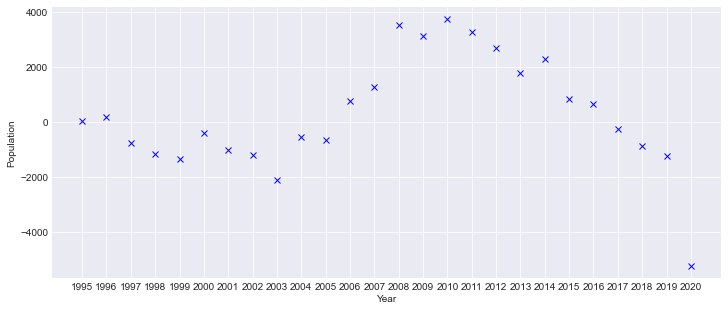

In [20]:
plt.figure(figsize=(12, 5))

plt.xlabel('Year'); 
plt.ylabel('Population'); 

plt.plot(np_slo.keys(), np_slo.values(), 'rx', color='b');

In [21]:
from scipy.stats import pearsonr
def plot_fit_residual(x, y, yp):

    # Model
    fig, axes  = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    axes[0].plot(x.ravel(), y.ravel(), "k.",  label="Podatki")
    axes[0].plot(x.ravel(), yp.ravel(), "g-", label="Model h(x)")
    axes[0].xticks(range(len(x)))
    axes[0].gca().set_xticklabels(x, rotation=90)
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].legend(loc=3)

    # Ostanki
    r = pearsonr(y.ravel(), y.ravel()-yp.ravel())[0]
    axes[1].plot(y.ravel(), y.ravel()-yp.ravel(), "k.", label="Ostanek")
    axes[1].set_xlabel("y")
    axes[1].set_ylabel("y-h(x)")
    axes[1].set_title("Graf ostankov, R=%.3f" % r)
    axes[1].legend(loc=4)
    plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

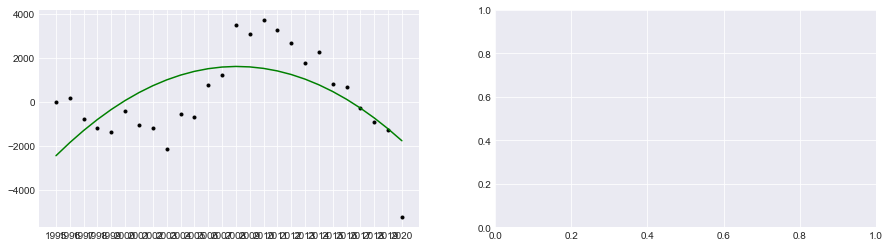

In [22]:
from sklearn.linear_model import LinearRegression

# Polinomska
X = np.zeros((len(np_slo.keys()), 2))
X[:,0] = np.array(list(np_slo.keys()))
X[:,1] = np.array(list(np_slo.keys()))
X[:,1] = X[:,1]**2

model = LinearRegression()
model.fit(X, np.array(list(np_slo.values())))

hx = model.predict(X)
plot_fit_residual(np.array(list(np_slo.keys())), np.array(list(np_slo.values())), hx)
hx
# linearna

"""a = np.array(list(np_slo.keys())).reshape(-1, 1)
b = np.array(list(np_slo.values())).reshape(-1, 1)


model = LinearRegression()
model.fit(a, b)
hx = model.predict(a)

plot_fit_residual(a, b, hx)
"""
pass

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(hx, np.array(list(np_slo.values())))

2582061.6558533683

****
**Analiza izobrazbe**

In [24]:
px1["DATA"]

,OBCINE,LETO,DOSEZENA IZOBRAZBA,SPOL,DATA
0,SLOVENIJA,2005,Izobrazba - SKUPAJ,Spol - SKUPAJ,813529
1,SLOVENIJA,2005,Izobrazba - SKUPAJ,Moski,454704
2,SLOVENIJA,2005,Izobrazba - SKUPAJ,Zenske,358825
3,SLOVENIJA,2005,Osnovnosolska ali manj,Spol - SKUPAJ,166006
4,SLOVENIJA,2005,Osnovnosolska ali manj,Moski,100017
...,...,...,...,...,...
54310,Ankaran/Ancarano,2021,"Visjesolska, visokosolska",Moski,137
54311,Ankaran/Ancarano,2021,"Visjesolska, visokosolska",Zenske,286
54312,Ankaran/Ancarano,2021,Neznano,Spol - SKUPAJ,NaN
54313,Ankaran/Ancarano,2021,Neznano,Moski,NaN


In [25]:
df1 = px1['DATA']
np1_iz = {}

for i in range(len(df1)):
    if df1.loc[i, "OBCINE"] == "SLOVENIJA" and df1.loc[i, "DOSEZENA IZOBRAZBA"] == "Visjesolska, visokosolska" and df1.loc[i, "SPOL"] == "Spol - SKUPAJ":
        np1_iz[str(df1.loc[i, "LETO"])] = float(df1.loc[i, "DATA"])
        
print(np1_iz)

{'2005': 170744.0, '2006': 179520.0, '2007': 189643.0, '2008': 199794.0, '2009': 207865.0, '2010': 213789.0, '2011': 227879.0, '2012': 233136.0, '2013': 241557.0, '2014': 251210.0, '2015': 261153.0, '2016': 275406.0, '2017': 294400.0, '2018': 306568.0, '2019': 316690.0, '2020': 319155.0, '2021': 329001.0}


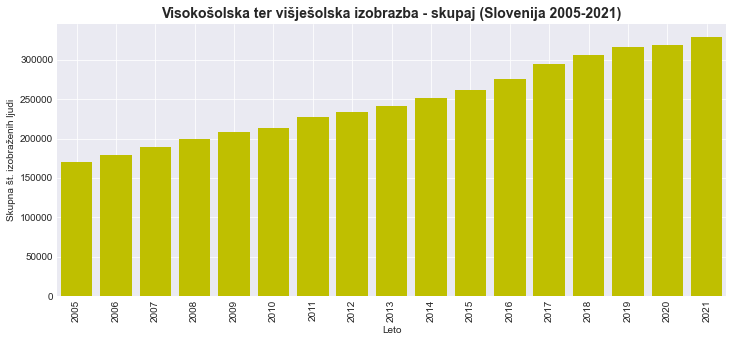

In [26]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(12, 5))
plt.title('Visokošolska ter višješolska izobrazba - skupaj (Slovenija 2005-2021)', fontsize=14, fontweight='bold')
plt.bar(np1_iz.keys(), np1_iz.values(), color='y')
plt.xlim(-0.5, len(np1_iz.keys())-0.5)
plt.xticks(range(len(np1_iz.keys())))
plt.gca().set_xticklabels(np1_iz.keys(), rotation=90)
plt.xlabel("Leto")
plt.ylabel("Skupna št. izobraženih ljudi")
plt.show()

****
**Analiza dohodkov**


In [27]:
px2["DATA"]

,OBCINE,KAZALNIK,LETO,DATA
0,SLOVENIJA,Povprecna mesecna bruto placa,2005,1157.07
1,SLOVENIJA,Povprecna mesecna bruto placa,2006,1212.8
2,SLOVENIJA,Povprecna mesecna bruto placa,2007,1284.79
3,SLOVENIJA,Povprecna mesecna bruto placa,2008,1391.43
4,SLOVENIJA,Povprecna mesecna bruto placa,2009,1438.96
...,...,...,...,...
39826,zuzemberk,Zaposlene osebe z izplacanimi nadurami,2017,12.9
39827,zuzemberk,Zaposlene osebe z izplacanimi nadurami,2018,17.3
39828,zuzemberk,Zaposlene osebe z izplacanimi nadurami,2019,14.7
39829,zuzemberk,Zaposlene osebe z izplacanimi nadurami,2020,11.7


In [28]:
df2 = px2['DATA']
np2_pla = {}

for i in range(len(df2)):
    if df2.loc[i, "OBCINE"] == "SLOVENIJA" and df2.loc[i, "KAZALNIK"] == "Povprecna mesecna bruto placa":
        np2_pla[str(df2.loc[i, "LETO"])] = float(df2.loc[i, "DATA"])
        
print(np2_pla)

{'2005': 1157.07, '2006': 1212.8, '2007': 1284.79, '2008': 1391.43, '2009': 1438.96, '2010': 1494.88, '2011': 1524.65, '2012': 1525.47, '2013': 1523.18, '2014': 1540.25, '2015': 1555.89, '2016': 1584.66, '2017': 1626.95, '2018': 1681.55, '2019': 1753.84, '2020': 1856.2, '2021': 1969.59}


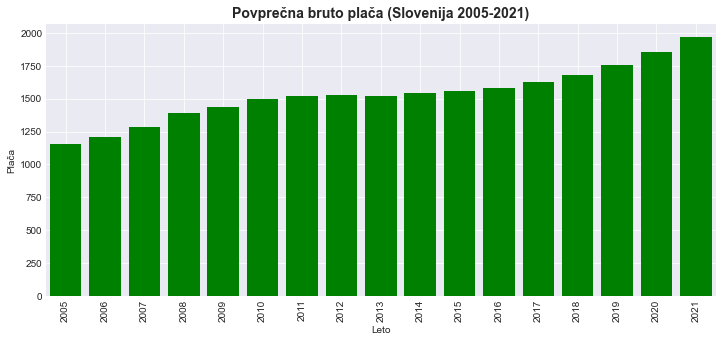

In [29]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(12, 5))
plt.title('Povprečna bruto plača (Slovenija 2005-2021)', fontsize=14, fontweight='bold')
plt.bar(np2_pla.keys(), np2_pla.values(), color='g')
plt.xlim(-0.5, len(np2_pla.keys())-0.5)
plt.xticks(range(len(np2_pla.keys())))
plt.gca().set_xticklabels(np2_pla.keys(), rotation=90)
plt.xlabel("Leto")
plt.ylabel("Plača")
plt.show()

In [30]:
np2_obcine = {}

for i in range(len(df2)):
    if df2.loc[i, "KAZALNIK"] == "Povprecna mesecna bruto placa":
        if df2.loc[i, "OBCINE"] not in np2_obcine.keys():
            np2_obcine[df2.loc[i, "OBCINE"]] = []
        try:
            np2_obcine[df2.loc[i, "OBCINE"]].append(float(df2.loc[i, "DATA"]))
        except ValueError:
            np2_obcine[df2.loc[i, "OBCINE"]].append(float("nan"))

for obcina in np2_obcine:
    print(obcina, ">", np.nanmean(np2_obcine[obcina]))

print("-------------------------------")
print(max(np2_obcine, key=np2_obcine.get), np.nanmean(np2_obcine[max(np2_obcine, key=np2_obcine.get)]))
print(min(np2_obcine, key=np2_obcine.get), np.nanmean(np2_obcine[min(np2_obcine, key=np2_obcine.get)]))

SLOVENIJA > 1536.5976470588234
Ajdovscina > 1402.705294117647
Ankaran > 1694.632857142857
Apace > 1308.0005882352943
Beltinci > 1219.6247058823528
Benedikt > 1347.956470588235
Bistrica ob Sotli > 1379.3500000000001
Bled > 1455.6976470588236
Bloke > 1239.2729411764708
Bohinj > 1179.9005882352942
Borovnica > 1337.3117647058823
Bovec > 1326.6588235294116
Braslovce > 1343.941176470588
Brda > 1396.5976470588234
Brezovica > 1332.2994117647058
Brezice > 1374.4288235294118
Cankova > 1344.3582352941175
Celje > 1493.1035294117648
Cerklje na Gorenjskem > 2069.562352941177
Cerknica > 1265.6870588235295
Cerkno > 1252.1611764705883
Cerkvenjak > 1393.7764705882355
Cirkulane > 1289.0188235294117
Crensovci > 1262.729411764706
Crna na Koroskem > 1489.6858823529412
Crnomelj > 1284.5682352941178
Destrnik > 1373.47
Divaca > 1415.300588235294
Dobje > 1554.4505882352942
Dobrepolje > 1235.1323529411766
Dobrna > 1306.4705882352941
Dobrova - Polhov Gradec > 1300.1817647058822
Dobrovnik/Dobronak > 1396.54
Dol pr

In [31]:
i = 0
for obcina in np2_obcine:
    for el in np2_obcine[obcina]:
        if math.isnan(el):
            print(obcina)
            i += 1
            break

print("Število občin z manjkajočimi vrednostmi:", i)

Ankaran
Mirna
Osilnica
Število občin z manjkajočimi vrednostmi: 3
